<a href="https://colab.research.google.com/github/Jalam1001/rag/blob/main/Copy_of_IBM_granite_docling_258m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **granite-docling-258m**

Granite Docling is a multimodal Image-Text-to-Text model engineered for efficient document conversion.


https://huggingface.co/ibm-granite/granite-docling-258M

In [ ]:
!nvidia-smi


Sun Sep 21 20:02:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   61C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip -q install --upgrade pip
!pip -q install "torch>=2.3.0" "transformers>=4.43.0" --index-url https://download.pytorch.org/whl/cu121
!pip -q install "docling>=2.0.0" "pypdfium2>=4.30.0" "python-multipart"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'pylatexenc' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pylatexenc'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [ ]:
!curl -L -o tiny.pdf "https://www.w3.org/WAI/ER/tests/xhtml/testfiles/resources/pdf/dummy.pdf"
!curl -L -o complex.pdf "https://arxiv.org/pdf/1706.03762.pdf"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13264  100 13264    0     0  15773      0 --:--:-- --:--:-- --:--:-- 15771
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   217  100   217    0     0    799      0 --:--:-- --:--:-- --:--:--   800
100 2163k  100 2163k    0     0  6939k      0 --:--:-- --:--:-- --:--:-- 6939k


In [ ]:
!docling --to md --to html --pdf-backend pypdfium2 tiny.pdf


2025-09-21 20:05:13.441497: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758485113.461341    1043 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758485113.467416    1043 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758485113.482599    1043 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758485113.482625    1043 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758485113.482629    1043 computation_placer.cc:177] computation placer alr

In [ ]:
# Uses CUDA; increase threads a bit on Colab GPU
!docling --to md --to html \
  --pipeline vlm --vlm-model granite_docling \
  --pdf-backend pypdfium2 --device cuda --num-threads 4 \
  complex.pdf


2025-09-21 20:06:22.231587: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758485182.250831    1397 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758485182.256699    1397 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758485182.271450    1397 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758485182.271477    1397 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758485182.271481    1397 computation_placer.cc:177] computation placer alr

In [ ]:
from IPython.display import HTML, display
for name in ["tiny.html", "complex.html", "pg-0001.html", "pg-0002.html", "pg-0003.html"]:
    try:
        display(HTML(open(name, "r", encoding="utf-8").read()[:30000]))
    except:
        pass


In [ ]:
from IPython.display import Markdown
display(Markdown(open("tiny.md").read()))


## Dummy PDF file

Provided proper attribution is provided, Google hereby grants permissi on to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.

## Attention Is All You Need

Ashish Vaswani Google Brain

avaswanji@google.com

Gooogle Research

lliong@google.com

lliong@google.com

lliong@google.com

lliong@google.com

lliong@google.com

lliong@google.com

lliong@google.com

lliong@google.com

lliong@google.com

lliong@google.com

lliong@google.com

lliong@google.com

lliong@google.com

lliong@google.com

lliong@google.com

lliong@google.com

lliong@google.com

## 1 Introduction

Recurrent neural networks, long short-term memory [13] and gated recurrent [7] neural networks in particular have been firmly established as state of the art approaches in sequence modeling and transduction problems such as language modeling and machine translation [35, 2, 5]. Numerous efforts have since continued to push the boundaries of recurrent language models and encoder-decoder architectures [38, 24, 15].

Recurrent models typically factor computation along the symbol positions of the input and output sequences. Aligning the positions to steps in computation time, they generate a sequence of hidden states h$\_{t}$ , as a function of the previous hidden state h$\_{t}$$\_{-}$$\_{1}$ and the input for position t . This inherently sequential nature precludes parallelization within training examples, which becomes critical at longer sequence lengths, as memory constraints limit batching across examples. Recent work has also achieved significant improvements in computational efficiency through factorization tricks [21] and conditional computation [32], while also improving model performance in case of the latter. The fundamental constraint of sequential computation has become an integral part of the model's architecture.

Attention mechanisms have become integral to the model's architecture and have been used in conjunction with recurrent neural networks [19, 26, 27]. In all but a few cases, attention mechanisms are used in conjunction with a recurrent network. In this work we focus on the case where attention mechanisms are used in conjunction with a recurrent network.

In this work we propose a model that can learn to recognize sequences of letters in a given word. The model learns to recognize letters in a sequence of letters in a given word, and then learns to recognize letters in a sequence of letters in a given word. The model learns to recognize letters in a sequence of letters in a given word, and then learns to recognize letters in a sequence of letters in a given word.

## 2 Background

The goal of reducing sequential computation also forms the foundation of the Extended Neural GPU [16], a set of neural networks that can be used to compute a set of operations such as input and output sequences, and to compute a set of operations such as output sequences. The goal of these neural networks is to compute a set of operations such as output sequences and to compute a set of operations such as input sequences and to compute a set of operations such as output sequences. The goal of these neural networks is to compute a set of operations such as output sequences and to compute a set of operations such as input sequences and to compute a set of operations such as input sequences and to compute a set of operations such as output sequences.

Self-attention is a model that can learn to recognize letters in a sequence of letters in a given word. The model learns to recognize letters in a sequence of letters in a given word, and then learns to recognize letters in a sequence of letters in a given word. The model learns to recognize letters in a sequence of letters in a given word, and then learns to recognize letters in a sequence of letters in a given word.

End-to-end memory networks are based on a recurrent attention mechanism instead of sequence-modeling. End-to-end memory networks are based on a recurrent attention mechanism instead of sequence-modeling. End-to-end memory networks are based on a recurrent attention mechanism instead of sequence-modeling. End-to-end memory networks are based on a recurrent attention mechanism instead of sequence-modeling.

To the best of our knowledge, however, the Transformer is the first transduction model relying entirely on self-attention to compute its predictions of its input and output sequences. To the best of our knowledge, however, the Transformer is the first transduction model relying entirely on self-attention to compute its predictions of its input and output sequences. We describe the Transformer in detail.

## 3 Model Architecture

Figure 1: The Transformer - model architecture.

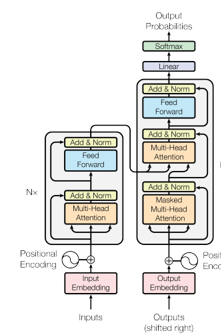

The Transformer follows this overall architecture using stacked self-attention and point-wise, fully connected layers for both the encoder and decoder, shown in the left and right halves of Figure 1, respectively.

## 3.1 Encoder and Decoder Stacks

The encoder is composed of a stack of identical layers. Each layer has two sub-layers. The first is a multi-head self-attention mechanism, and the second is a simple, position-wise connected feed-forward network. We employ a residual connection [11] around each sub-layer, which is a simple, position-wise connected feed-forward network. The output of each sub-layer is then used to feed the output of the next sub-layer. The output of each sub-layer is then used to feed the output of the next sub-layer.

The decoder is composed of a stack of identical layers. Each layer has two sub-layers. The first is a multi-head self-attention mechanism, and the second is a simple, position-wise connected feed-forward network. We employ a residual connection [11] around each sub-layer, which is a simple, position-wise connected feed-forward network. The output of each sub-layer is then used to feed the output of the next sub-layer. The output of each sub-layer is then used to feed the output of the next sub-layer.

The decoder is composed of a stack of identical layers. Each layer has two sub-layers. The first is a multi-head self-attention mechanism, and the second is a simple, position-wise connected feed-forward network. We employ a residual connection [11] around each sub-layer, which is a simple, position-wise connected feed-forward network. The output of each sub-layer is then used to feed the output of the next sub-layer. The output of each sub-layer is then used to feed the output of the next sub-layer.

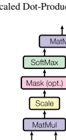

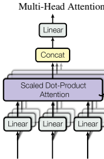

Figure 2: (left) Scaled Dot-Product Attention (right) Multi-Head Attention consists of several attention layers running in parallel.

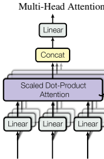

of the values, where the weight assigned to each value is computed by a compatibility function of the query with the corresponding key.

## 3.2.1 Scaled Dot-Product Attention

We call our particular attention "Scaled Dot-Product Attention" (Figure 2). The input consists of queries and keys of dimension d$\_{k}$ , and values of dimension d$\_{v}$ . We compute the dot products of the query with all keys, divide each by d$\_{k}$ , and apply a softmax function to obtain the weights on the values.

In practice, we compute the attention function on a set of queries simultaneously, packed together into matrices K and V . We compute the matrix of outputs as:

$$A \text { attention} ( Q , K , V ) = \text {softmax} ( \frac { Q K ^ { T } } { \sqrt { d _ { k } } } ) V$$

The two most common used attention functions are additive attention [2], and dot-product (multi-partitive) attention. Dot-product attention is identical to our algorithm, except for the scaling factor of 1 √ $\_{d$\_{k}$}$. Additive attention computes the compatibility function using a feed-forward network with a single hidden layer. While the two are similar, it is more efficient to compute the compatibility function using a multi-dimensional matrix.

While for small values of d$\_{k}$ , the two mechanisms perform similarly, additive attention outperforms dot product attention without scaling for larger values of d$\_{k}$ [3]. We suspect that for larges values of d$\_{k}$ , the dot product is more efficient to compute.

## 3.2.2 Multi-Head Attention

Instead of performing a single attention function with d$\_{model}$ -dimensional keys, values and queries, we found it beneficial to linearly project the queries, keys and values through d$\_{k}$ and d$\_{v}$ dimensions, respectively. On each of these projections, key and values we then perform the after-projection function in parallel, yielding d$\_{v}$ -dimensional

$^{4}$To illustrate why the dot products get large, assume that the components of q and k are independent random variables with mean 0 and variance d$\_{k}$ .

output values. These are concatenated and once again projected, resulting in the final values, as depicted in Figure 2.

Multi-head attention allows the model to jointly attend to information from different representations subspaces at different positions. With a single attention head, averaging inhibits this.

$$M \text {MultiHead} ( Q , K , V ) = C \text {Concat} ( \text {head} _ { 1 } , \dots , \text {head} _ { h } ) W ^ { O } \\ \text {where head} _ { i } = A \text {Attention} ( Q W _ { i } ^ { Q } , K W _ { i } ^ { K } , V W _ { i } ^ { V } )$$

Where the projections are parameter matrices W Q i - ∈ R d$\_{model}$ × d$\_{k}$ , W K i ∈ R d$\_{model}$ × d$\_{k}$ , W i ∈ R d$\_{model}$ × d$\_{v}$ and W O ∈ R d$\_{model}$ × d$\_{model}$ .

In this work we employ h = 8 parallel attentent layers, or heads. For each of these we use d$\_{k}$ = d$\_{v}$ = d$\_{model}$ / h = 64. Due to the reduced dimension of each head, the total computational cost is similar to that of single-head attention with full dimensionality.

## 3.2.3 Applications of Attention in our Model

The Transformer uses multi-head attention in three different ways:

- · In "encoder-decoder" attention layers, the queries come from the previous decoder layer, and the attention layer comes from the output of the encoder. This allows every position in the decoder to attend to all the previous positions in the input sequence. This mimics the typical encoder-decoder attention mechanisms in sequence-to-sequence modems such as [33, 82, 9].
- · In "multi-head" attention layers, the queries come from the previous decoder layer, and the attention layer comes from the output of the encoder. This mimics the typical encoder-decoder attention mechanisms in sequence-to-sequence modems such as [33, 82, 9].
- · In "multi-head" attention layers, the queries come from the previous decoder layer, and the attention layer comes from the output of the encoder. This mimics the typical encoder-decoder attention mechanisms in sequence-to-sequence modems such as [33, 82, 9].

## 3.3 Position-wise Feed-Forward Networks

In addition to attention sub-layers, each of the layers in the encoder and decoder contain a fully connected layer which is called a ReLU activation layer. This is the same as the ReLU activation layer in the decoder.

$$\text {FFN} ( x ) = \max ( 0 , x W _ { 1 } + b _ { 1 } ) W _ { 2 } + b _ { 2 }$$

While the linear transformations are the same across different positions, they use different parameters. We use the same parameters for the layer to the right of the layer to the left of the layer. The dimensionality of the input and output is the same.

## 3.4 Embeddings and Softmax

Similarly to other sequence transduction models, we use learned embeddings to convert the input tokens and output tokens to vectors of dimension d$\_{model}$ . We also use the usual learned linear transformation and softmax function to convert the output to predicted next-token probabilities. In our model, we share the same weight matrix between the two embedding layers and the pre-softmax layer.

Table 1: Maximum path lengths, per-layer complexity and minimum number of sequential operations for different layer types. n is the sequence length, d is the representation dimension, k is the kernel size of convolution and r the size of the neighborbod in restricted self-attention.

| Layer Type                  | Complexity per layer   | Sequential Operations   | Maximum Path Length   |
|-----------------------------|------------------------|-------------------------|-----------------------|
| Self-Attention              | O ( n 2 · d )          | O (1)                   | O (1)                 |
| Recurrent                   | O ( n · d $^{2}$)      | O ( n )                 | O ( n )               |
| Convolutional               | O ( k · n · d 2 )      | O (1)                   | O ( log$_{k}$( n )    |
| Self-Attention (restricted) | O ( r · n · d )        | O (1)                   | O ( n/r )             |

## 3.5 Positive Encoding

Since our model contains no recurrence and no convolution, in order for the model to make use of the order of the sequence, we must inject some information about the relative or absolute position of the tokens in the sequence. To this end, we add "positional encodings" to the input embeddings at the bottom of the encoder and decoder stacks. The positional encodings have the same dimension d$\_{model}$ as the embeddings, so that the two can be summed. There are many choices of positional encodings, learned and fixed, as shown in [9].

In this work, we use sine and cosine functions of different frequencies.

$$P E _ { ( p o s , 2 i ) } = s i n ( p o s / 1 0 0 0 ^ { 2 i / d _ { m o d e l } } )$$

where pos is the position and i is the dimension. That is, each dimension of the positional encoding corresponds to a sinusoid. The wavelengths form a geometric progression from 2 π to 100 0 · 2 π . We chose this function for our model, because we hypothesized it would allow the model to learn to attend to relative positions, since for any fixed offset k , PE$\_{pos}$$\_{k}$ can be represented as a linear function of PE$\_{pos}$ .

We also experimented with using learned positional embeddings [9] instead, and found that the two versions produced nearly identical results (see Table 3 row (E)). We chose the sinusoidal version because it allows the model to learn to attend to relative positions, and because it can be used to learn to attend to relative positions in the model.

## 4 Why

In this section we compare various aspects of self-attention layers used for mapping one variable-length sequence to the recurrent and convolutional layers. In this section, we compare the two approaches, and show that the latter is more efficient.

One is the total computational complexity per layer. Another is the amount of computation that can be performed by the model. The third is the path length between long-range dependencies in the network. Learning long-range dependencies is a key challenge in many sequence transduction tasks. One key factor affecting the ability to learn such dependencies is the length of the path from the paths forward and backward signals. The shorter these paths, the more significant the input and output sequences, the easier it is to learn long-range dependencies [12]. Hence we also compare the maximum path length between any two input and output sequences, and the maximum path length between the two input and output sequences in networks composed of different layer types.

As noted in Table 1, a self-attention layer connects all positions with a constant number of sequential operations, whereas a recurrent layer requires O ( n ) sequential operations. In terms of computational complexity, self-attention layers are faster than recurrent layers when the sequence

length n is smaller than the representation dimensionality d , which is most often the case with sentence representations used by state-of-the-art models in machine translations, such as word-piece [38] and bytte-pair [31] representations. To improve the performance of the model, we used a large number of word-piece representations, which were used to train the model.

A single convolutional layer with kernel width k ·

As side benefit, self-attention could yield more interpretable models. We inspect attention distributions from our models and present examples. Not only do we show that attention is a good way to improve the performance of the model, but it is also a good way to improve the performance of the network.

## 5 Training

This section describes the training regime for our models.

## 5.1 Training Data and Batching

We trained on the standard WMT 2014 English-German dataset consisting of about 4 million sentences. Sentences were encoded using 16-bit UTF-8 strings, and were split into 16-bit chunks. The number of chunks is determined by the number of words in the model. The number of words in the model is 16,000,000. The number of chunks is 16,000,000.

We trained on the standard WMT 2014 English-German dataset consisting of about 37000 tokens. For English-French, we used the significantly larger WMT 2014 English-French dataset consisting of about 36M sentences and split into 32000-word-piece vocabulary [38].

We trained on the standard WMT 2014 English-German dataset consisting of about 37000 tokens. For English-French, we used the significantly larger WMT 2014 English-French dataset consisting of about 36M sentences and split into 32000-word-piece vocabulary [38]. Sentence pairs were batched together by approximate sequence length. Each batch contained a set of sentence pairs containing approximately 25000 source tokens and 25000 target tokens.

## 5.2 Hardware and Schedule

We trained on the standard WMT 2014 English-German dataset consisting of about 37000 tokens. For English-French, we used the significantly larger WMT 2014 English-French dataset consisting of about 36M sentences and split into 32000-word-piece vocabulary [38].

We trained on the standard WMT 2014 English-German dataset consisting of about 37000 tokens. For English-French, we used the significantly larger WMT 2014 English-French dataset consisting of about 36M sentences and split into 32000-word-piece vocabulary [38].

We trained on the standard WMT 2014 English-German dataset consisting of about 37000 tokens. For English-French, we used the significantly larger WMT 2014 English-French dataset consisting of about 36M sentences and split into 32000-word-piece vocabulary [38].

## 5.3 Optimizer

We used the Adam optimizer [20] with β$\_{1}$ = 0 . 9 , β$\_{2}$ = 0 . 98 and ϵ = 10 - $^{9}$. We varied t the learning rate over the entire formula.

Table 2: The Transformer achieves better BLEU scores than previous state-of-the-art models on the English-to-German and English-to-French newstests 2014 tests at a fraction of the training cost.

| Moodle                          | BLEU   | BLEU            | Training Cost (FLCPs)   |
|---------------------------------|--------|-----------------|-------------------------|
|                                 | EN-DE  | EN-FR           | EN-DE                   |
| ByteNet [18]                    | 23.7   | .5              | 1.0 · 10$^{20}$         |
| DeeP-Att + PosUnk [39]          | 39.2   | 2.3 · 10$^{19}$ | 1.4 · 10$^{20}$         |
| GNMT + RL [38]                  | 24.6   | .6              | 1.5 · 10$^{20}$         |
| ConvS2S [9]                     | 25.6   | .6              | 1.5 · 10$^{20}$         |
| MoE [32]                        | 26.3   | .6              | 1.2 · 10$^{20}$         |
| DeeP-Att + PosUnk Ensemble [39] | 40.4   | 2.0 · 10$^{19}$ | 8.0 · 10$^{20}$         |
| GNMT + RL Ensemble [38]         | 26.6   | 41.9            | 1.2 · 10$^{21}$         |
| ConvS2S Ensemble [9]            | 26.6   | 41.9            | 1.2 · 10$^{21}$         |
| Transformer (base model)        | 27.3   | 38.1            | 3.3 · 10$^{18}$         |
| Transformer (big)               | 28.4   | 41.8            | 2.3 · 10$^{19}$         |

Residual Dropout We apply dropout [33] to the output of each sub-layer, before it is added to the sub-layer in output and normalized. In addition, we apply dropout to the outputs of the embeddings and the positional encodings in both the encoder and decoder stacks. For the base model, we use a rate of P$\_{drop}$ = 0 . 1 .

Label Smoothing During training, we employ label smoothing of value ϵ$\_{ls}$ = 0 . 1 [36]. This hurts perplexity, as the model learns to be more unsure, accuracy and BLEU score.

## 6 Results

## 6.1 Machine Translation

On the WMT 2014 English-to-German translation task, the big transformer model (Transformer (big) in Table 2) outperforms the best previously reported models (including ensembles) by more than 2.0 BLEU, establishing a new state-of-the-art BLEU score of 28.4 . The model is also more accurate than the previous state-of-the-art model (the one trained on English-to-German corpus) and is more accurate than the previous state-of-the-art model (the one trained on English-to-French corpus) (Table 2).

On the WMT 2014 English-to-French translation task, our model achieves a BLEU score of 41.0 , outperforming all of the previously published models (at least 1/4 the training cost of the previous state-of-the-art model). The Transformer (big) model trained for English-to-French used dropout rate P$\_{drop}$ = 0 . 1 , instead of 0 . 3 .

For the base models, we used a model obtained by averaging the last 5 checkpoints, which were written at ten minute intervals. For the big models, we averaged the last 20 checkpoints. We used beam search with a beam size of 4 and lenght penalty α = 0 . 6 [38]. These hyperparameters were chosen after experimentation on the development set. We set the maximum output length during inference to input length + 50 , but terminate when possible [38].

Table 2 summarizes our results and compares our translation quality and training costs to other model architectures from the literature. We estimate the number of floating point operations used to train a model by multiplying the training time by the number of floating-point operations per GPU used, and then estimating the number of ensembles used to train a model by multiplying the number of GPUs used, and then estimating the number of ensembles used to train a model by single-precision floating-point capacity of each GPU.

## 6.2 Model Variations

To evaluate the importance of different components of the Transformer, we varied our base model in different ways, measuring the performance in performance on English-to-German translation.

$^{5}$We used values of 2.8, 3.7, 6.0 and 9.5 TFLOPS for K80, K40, M40 and P100, respectively.

Table 4: Thre Transformer generalizes well to English constituency parsing (Results are on Section 23 of WSJ)

| Parser                           | Training                 |   WSJ 23 Ft |
|----------------------------------|--------------------------|-------------|
| Vinyals & Kaiser el. (2014) [37] | WSJ only, discriminative |        88.3 |
| Petrov et al. (2006) [29]        | WSJ only, discriminative |        90.4 |
| Zhu et al. (2013) [40]           | WSJ only, discriminative |        90.4 |
| Dyer et al. (2016) [8]           | WSJ only, discriminative |        91.7 |
| Transformer (4 layers)           | WSJ only, discriminative |        91.3 |
| Zhu et al. (2013) [40]           | semi-supervised          |        91.3 |
| Huang & Harper (2009) [14]       | semi-supervised          |        92.1 |
| McClosky et al. (2006) [26]      | semi-supervised          |        92.1 |
| Vinyals & Kaiser el. (2014) [37] | semi-supervised          |        92.7 |
| Transformer (4 layers)           | semi-supervised          |        92.7 |
| Luong et al. (2015) [23]         | multi-task               |        93   |
| Dyer et al. (2016) [8]           | generative               |        93.3 |

increased the maximum output length to input length + 300. We used a beam size of 21 and α = 0 . 3 for both WSJ only and the semi-supervised setting.

Our results in Table 4 show that despite the lack of task-specific tuning our model performs surprisingly well. Yielding better results than all previously reported models with the exception of the Recurrent Neural Network Grammar [8].

In contrast to RNN sequence-to-sequence models, the Transformer outperforms the BerkeleyParser [29] even when training only on the WSJ training set of 40K sentences.

## 7 Conclusion

In this work we presented the Transformer, the first sequence transduction model based entirely on attention, replacing the recurrent layers most commonly used in encoder-decoder architectures with multi-headed self-attention.

For translation tasks, the Transformer can be trained significantly faster than architectures based on recurrent or convolutional layers. On both WSJ 2014 English-to-German and WSJ 2014 English-to-French translation tasks, we achieve a new state of the art, and in the former task our best model outperforms even all previously reported models with the exception of the Transformer.

We are excited about the future of attention-based models and plan to extend the Transformer to problems involving input and output modalities other than the usual text and to investigate that model's ability to efficiently handle large inputs and outputs such as images, audio and video.

The code we used to train and evaluate our models is available at https://github.com/tensorflow/tensorflow/blob/master/training/

Acknowledgements We are grateful to Nal Kachubrenner and Stephan Gouws for their fruitful comments, corrections and inspiration.

## References

- [1] Jimmy Lei Ba, Jamie Ryan Kiros, and Geoffrey E Hinton. Layer normalization. arXiv preprint arXiv:1607.06450 , 2016.
- [2] Dzmitry Bahdanau, Kyunghyun Cho, and Yoosua Bengio. Neural machine translation by jointly learning to align and translate. CoRR , abs/1409.0473 , 2014.
- [3] Denny Britz, Anna Goldie, Minh-Thang Luong, and Quoc V. Le. Massive exploratidion of neural machine translation architectures. CoRR , abs/1703.03906 , 2017.
- [4] Jianpeng Cheng, Li Dong, and Mirella Lapatia. Long short-term memory-networks for machine reading. arXiv preprint arXiv:1601.06733 , 2016.

- [5] Kyun-gyun Cho, Bart van Merrienboer, Cagar Gulcehre, Fethi Bougares, Holger Schwenk, and Yoshua Bengio. Learning phrase representations using rnn encoder-decoder for statistical machine translation. CoRR , abs/1406.1078, 2014.
- [6] Francios Chollet. Xception: Deep learning with depthwise separable convolutons. arXiv preprint arXiv:1610.02357 , 2016.
- [7] Junyong Chung, Çaglar Gülçehre, Kyunghyun Cho, and Yoshua Bengio. Empirical evaluation of gated recurrent neural networks on sequence modeling. CoRR , abs/1412.3555, 2014.
- [8] Chris Dyer, Adhiguna Kuncoro, Miguel Balesteros, and Noah A. Smith. Recurrent neural network grammars. In Proc. of NAACL , 2016.
- [9] Jonas Gehring, Michael Auli, David Grangie, Denis Yarats, and Yann N. Dauphina. Convolutional sequence to sequence learning. arXiv preprint arXiv:1705.03122, 2017.
- [10] Alex Graves. Generating sequences with recurrent neural networks. arXiv preprint arXiv:1308.0850 , 2013.
- [11] Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun. Deep residual learning for image recognition. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition , 2016.
- [12] Sepp Hocher, Yoshua Bengio, Paolo Scherl, and Jürgen Schmidhuber. Gradent flow in recurrent nets: the difficulty of learning long-term dependencies. In Proc. of The Royal Society , 2001.
- [13] Sepp Hocher and Jürgen Schmidhuber. Long short-term memory. Neural computation , 9(8):1735-1780, 2001.
- [14] Zhongqiang Huang, Mary Harper, and Shaoqing Ren. Learning PCFG grammars with latent annotations across languages. In Proceedings of the 2009 Conference on Empirical Methods in Natural Language Processing , 2009.
- [15] Rafal Guevizc, Oriol Vinyals, and Schuiker, Noam Shazeer, and Yonghui Wu. Exploring the links of language modeling. arXiv preprint arXiv:1602.02410 , 2016.
- [16] Łukasz Kiser and Samy Bengio. Can active memory replace attention? In Advances in Neural Information Processing Systems , 2016.
- [17] Łukasz Kiser and Ilya Sutskever. Neural GPUs learn algorithms. In International Conference on Learning Representations (ICLR) , 2016.
- [18] Nal Kachlbrenner, Lasse Espeholt, Karen Simonyan, Aaron van den Oord, Alex Graves, and Ko-ray Kavukcuok. Neural machine translation: a linear time arXiv preprint arXiv:1009.1009 , 2017.
- [19] Yoon Kim, Carl Denton, Luong Hoang, and Alexander M. Rush. Structured attention networks. In International Conference on Learning Representations , 2017.
- [20] Diedekar Kingma and Jimmy Ba. A method for stochastic optimization. In ICLR , 2015.
- [21] Oleksii Kuchiev and Boris Ginsburg. Factorization tricks for LSTM networks. arXiv preprint arXiv:1703.0722 , 2017.
- [22] Zhouhan Lin, Minwei Feng, Cicero Nogueira dos Santos, Mo Yu, Bing Xiaing, Bowen Zhou, and Yoshua Bengio. A structured reflexive attention sentence embedding. arXiv preprint arXiv:1703.03130 , 2017.
- [23] Minh-Thang Luong, Quoc V. Le, Ilya Sutskever, Oriol Vinyals, and Lukasz Kaiser. Multi-task sequence to sequence learning. arXiv preprint arXiv:1511.06114 , 2015.
- [24] Minh-Thang Luong, Hieu Pham, and Christopher D Manning. Effective approaches to attention-based neural machine translation. arXiv preprint arXiv:1508.04025 , 2015.

- [25] Mitchell P Marcus, Mary Ann Marcinkiewicz, and Beatrice Santorini. Building a large annotated corpus of english: The penn treebank. Computational linguistics , 19(2):313-330, 1993.
- [26] David McClosky, Eugene Charniak, and Mark Johnson. Effective self-training for parsing. In Proceedings of the Human Language Technology Conference of the NAACL, Main Conference , pages 152-159. ACL, June 2006.
- [27] Ankur Parikh, Oscar Tackström, Dipanjan Das, and Jakob Uszkoreit. A decomposable attention model. In Empirical Methods in Natural Language Processing , 2016.
- [28] Romai Paulus, Caiming Xiong, and Richarhard Socher. A deep reinforced model for abstracti summarization. arXiv preprint arXiv:1705.04304 , 2017.
- [29] Slav Petrov, Leon Rattain, Thibaux, and Dan Klein. Learning accurate. compact, and interpretable tree annotation. In Proceedings of the 21st International Conference on Computational Linguistics and 44th Annual Meeting of the ACL, pages 433-440. ACL, July 2006.
- [30] Ofir Press and Lior Wolf. Using the output embedding to improve language models. arXiv preprint arXiv:1608.05859 , 2016.
- [31] Rico Sennrich, Barry Haddow, and Alexandr Bairch. Neural machine translation of rare words with subword units. arXiv preprint arXiv:1508.07907 , 2015.
- [32] Noam Shazeer, Azalia Mirhosei, Krzysztof Maziarz, Andy Davis, Quoc Le, Geoffrey Hinton, and Jeff Dean. Outrageous large neural networks: The sparsely-gated mixture-of-experts layer. arXiv preprint arXiv:1701.06538 , 2013.
- [33] Nitish Srivastava, Geoffrey Hinton, Alex Krizhevsky, Ilya Sutskever, and Russel Salamon. Salakhnuti-Novin. Dropout: a simple way to prevent neural networks from overfitting. Journal of Machine Learning Research , 15(1):1929-1958, 2014.
- [34] Sainyar Sukhbaatar, Arthur Szlamb, Jason Weston, and Rob Fergus. End-to-end memory networks. In C. Cortes, N. D. Lawrence, D. D. Lee, and M. Sugiyama, and R. Garnett, editors, Advances in Neural Information Processing Systems , pages 2440-2448. Curran Associates, Inc., 2015.
- [35] Ilya Sutskever, Oriol Vinyal, and Quoc V. Le. Sequence to sequence learning with neural networks. In Advances in Neural Information Processing Systems , pages 3104-3122, 2014.
- [36] Christin Szegedy, Vincent Vanhoucke, Serkey Igoff, Jonathon Shlens, and Zbigniew Wojna. Rethinking the inception architecture for computer vision. CoRR , abs/1512.00567, 2015.
- [37] Vinyal &amp; Kaiser, Koo, Petrov, Sutskever, and Hinton. Grammar as a foreign language. In Advances in Neural Information Processing Systems , 2015.
- [38] Yongui Wu, Mike Schuster, Zhifeng Chen, Quoc V Le, Mohammad Norouzi, Wolfgang Machrey, Maxim Krikun, Yuan Cao, Qin Gao, Klaus Macherey, et al. Google's neuGLYPHnal machine translation system: Bridging the gap between human and machine translation. arXiv preprint arXiv:1609.08144 , 2016.
- [39] Jie Zhou, Ying Cao, Xuguang Wang, Peng Li, and Wei Xu. Deep recurrent models with fast-forward connections for neural machine translation. CoRR , abs/1606.04199 , 2016.

## Attention Visualizations

Figure 3: An example of the attention mechanism following long-distance dependencies in the encoder self-attention in layer 5 of 6. Many of the attention heads attend to a distant dependency of the verb 'making', completing the phrase 'making..more difficult'. Attention here was only for the word 'making'. Different colors represent diffrented lights. Best viewed in color.

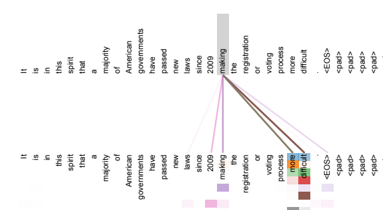

Figure 4: Two attention heads, also in layer 5 of 6, apparently involved in anaphora resolution. Top: Full attentions for head 5. Bottom: Isolated attentions from just the word 'its' for attention heads 5 and 6. Note that the attentions are very sharp for this word.

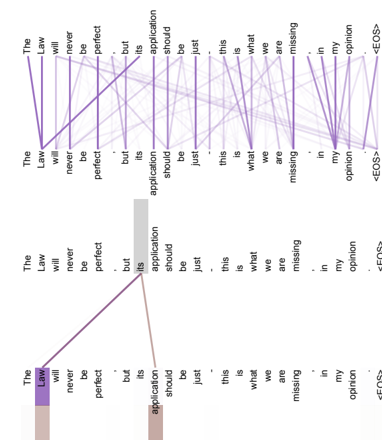

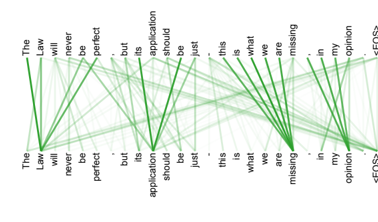

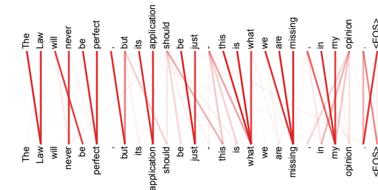

In [ ]:
from IPython.display import Markdown
display(Markdown(open("complex.md").read()))
